# Which City In Pittsburgh has the least Police arrests


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
arrests_df = pd.read_csv('policearrest.csv')
print('Preview of dataset:')
display(arrests_df.head())

Preview of dataset:


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...


In [5]:
arrest_counts = arrests_df['Neighborhood'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'ArrestCount']

In [6]:
safest = arrest_counts.iloc[-1]
print(f"Safest neighborhood: {safest['Neighborhood']} with {safest['ArrestCount']} arrests.")

Safest neighborhood: Chartiers with 14 arrests.


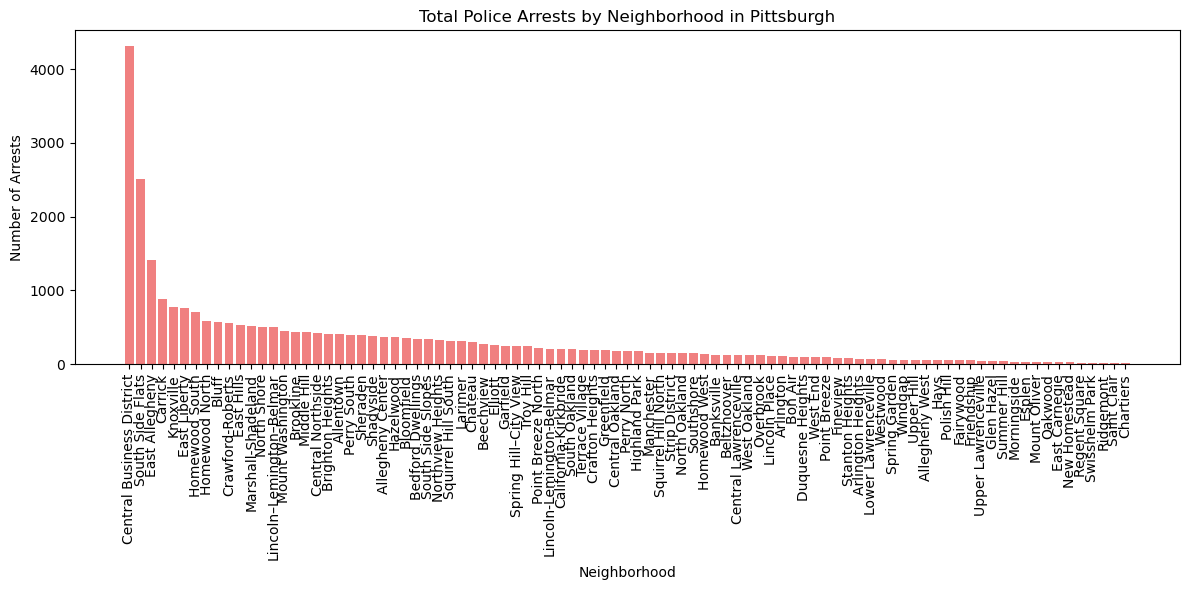

In [9]:
plt.figure(figsize=(12,6))
plt.bar(arrest_counts['Neighborhood'], arrest_counts['ArrestCount'], color='lightcoral')
plt.xticks(rotation=90)
plt.title('Total Police Arrests by Neighborhood in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.tight_layout()
plt.show()

In [21]:
print("\n### Analysis Narrative")
print("Based on the number of police arrests, the safest neighborhood in Pittsburgh is", safest['Neighborhood'], ".")


### Analysis Narrative
Based on the number of police arrests, the safest neighborhood in Pittsburgh is Chartiers .


In [11]:
violent_crime_categories = [
    'Assault Offenses',
    'Robbery',
    'Homicide Offenses',
    'Kidnapping/Abduction',
    'Sex Offenses'
]


all_neighborhoods = arrests_df['Neighborhood'].dropna().unique()
all_neighborhoods_df = pd.DataFrame(all_neighborhoods, columns=['Neighborhood'])

violent_crimes_df_filtered = arrests_df[
    arrests_df['NIBRS_Offense_Category'].isin(violent_crime_categories)
].dropna(subset=['Neighborhood']).copy()


violent_counts = violent_crimes_df_filtered.groupby('Neighborhood').size().reset_index(
    name='Total_Violent_Crimes_Arrests'
)

neighborhood_violent_crimes = all_neighborhoods_df.merge(
    violent_counts,
    on='Neighborhood',
    how='left'
).fillna(0)


bottom_10_neighborhoods = neighborhood_violent_crimes.sort_values(
    by='Total_Violent_Crimes_Arrests',
    ascending=True
).head(10)


print("10 Neighborhoods with the Least Violent Crime Arrests:")
print(bottom_10_neighborhoods.to_string(index=False))


10 Neighborhoods with the Least Violent Crime Arrests:
  Neighborhood  Total_Violent_Crimes_Arrests
 Regent Square                           0.0
Swisshelm Park                           1.0
     Ridgemont                           2.0
   Saint Clair                           5.0
     Chartiers                           7.0
       Oakwood                           8.0
 East Carnegie                           8.0
Allegheny West                           8.0
   Polish Hill                           9.0
    Friendship                           9.0


In the original dataset all crime was included, of course, all crime is not exactly violent.
I'm sure most would rather hear about shoplifting arrests than murders and homocides.
In order to accommadate, we decided to only evaluate violent crimes which include:
Assault Offenses, robbery, Homocide offenses, Kidnapping/Abduction, and sex offense.